<b>Uwaga:</b> Należy rozwiązać oba poniższe zadania. Na zaliczenie potrzeba co najmniej 3 pkt. 
<p></p>

1. <b>Zadanie 1.</b>(2x1.5 pkt): Zreplikować wyniki  związane z  materiałem na stronie <a href="https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/">2d fourier transform in python and fourier synthesis of images</a>. Istotą tego zadania jest poprawne zrozumienie działania transformaty Fouriera na obrazach  - jego zaliczenie będzie polegało na odpowiedzi na dwa pytania teoretyczne.

2. <b>Zadanie 2.</b>(2x1 pkt): Napisać kod dwóch filtrów opartych o transformatę Fouriera: dolno i górnoprzepustowego. W pierwszym przypadku przykładowy obraz dobrej jakości zaburzyć kolejno trzema różnymi szumami dostępnyhmi w programie Gimp. W każdym przypadku zastosować filtr dolnoprzepustowy możliwie dokładnie przywracający obraz przed zaszumieniem. Następnie wygenerować filtr górnoprzepustowy wizualizujący w trzech powyższych przypadkach postać dodanego szumu.  Materiał referencyjny znajduje się m.in. na stronie
<a href="https://fairyonice.github.io/Low-and-High-pass-filtering-experiments.html">Low and High pass filtering experiments.html</a>. 

## Zadanie 1

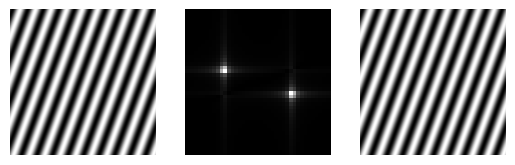

In [17]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100
angle = np.pi/9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")

plt.subplot(131)
plt.imshow(grating)
plt.axis("off")

# Calculate the Fourier transform of the grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(132)
plt.imshow(abs(ft))
plt.axis("off")
plt.xlim([480, 520])
plt.ylim([520, 480])

# Calculate the inverse Fourier transform of 
# the Fourier transform
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part

plt.subplot(133)
plt.imshow(ift)
plt.axis("off")
plt.show()

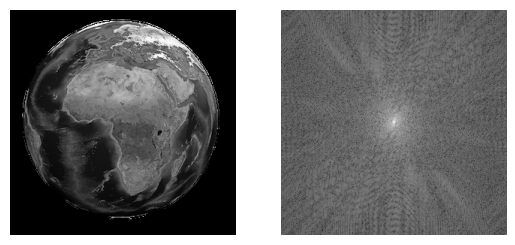

In [22]:
# fourier_synthesis.py

import numpy as np
import matplotlib.pyplot as plt

image_filename = "Earth.png"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

plt.set_cmap("gray")

ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()

In [ ]:
# fourier_synthesis.py

import numpy as np
import matplotlib.pyplot as plt

image_filename = "Elizabeth_Tower_London.jpg"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

# Array dimensions (array is square) and centre pixel
# Use smallest of the dimensions and ensure it's odd
array_size = min(image.shape) - 1 + min(image.shape) % 2

# Crop image so it's a square image
image = image[:array_size, :array_size]
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)

# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap("gray")

ft = calculate_2dft(image)

# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0

# All steps are displayed until display_all_until value
display_all_until = 200
# After this, skip which steps to display using the
# display_step value
display_step = 10
# Work out index of next step to display
next_display = display_all_until + display_step

# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating

        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        # Don't display every step
        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                # Accelerate animation the further the
                # iteration runs by increasing
                # display_step
                display_step += 10
            display_plots(rec_grating, rec_image, idx)

plt.show()

## Zadanie 2

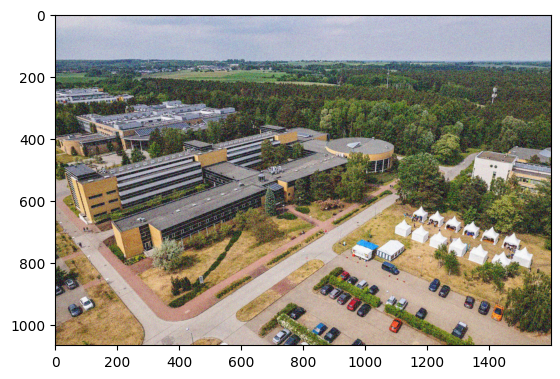

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.757753222571058e-06..1.1031931990186616].


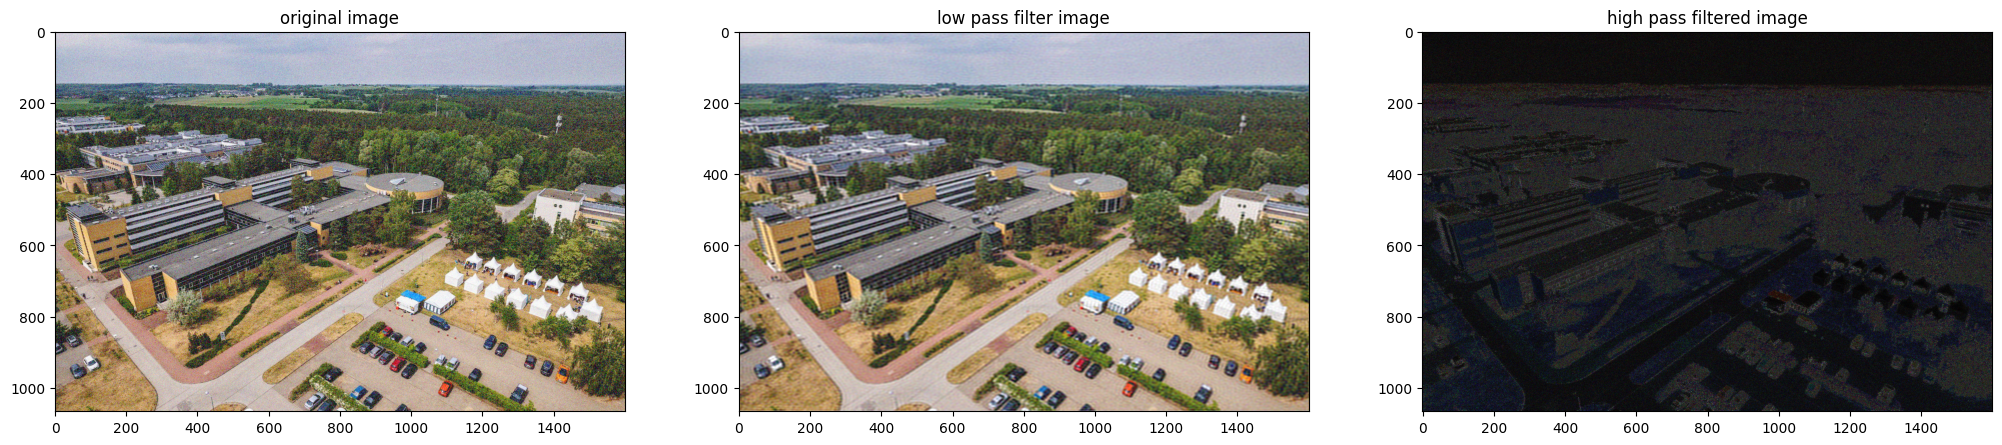

In [1]:
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread("wmi1.jpg")/float(2**8)
plt.imshow(img)
plt.show()

shape = img.shape[:2]

def draw_cicle(shape,diamiter):
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)
    center = np.array(TF.shape)/2.0

    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diamiter **2
    return(TF)


TFcircleIN   = draw_cicle(shape=img.shape[:2],diamiter=150)
TFcircleOUT  = ~TFcircleIN



fft_img = np.zeros_like(img,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(img[:,:,ichannel]))



def filter_circle(TFcircleIN,fft_img_channel):
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleIN] = fft_img_channel[TFcircleIN]
    return(temp)

fft_img_filtered_IN = []
fft_img_filtered_OUT = []
## for each channel, pass filter
for ichannel in range(fft_img.shape[2]):
    fft_img_channel  = fft_img[:,:,ichannel]
    ## circle IN
    temp = filter_circle(TFcircleIN,fft_img_channel)
    fft_img_filtered_IN.append(temp)
    ## circle OUT
    temp = filter_circle(TFcircleOUT,fft_img_channel)
    fft_img_filtered_OUT.append(temp) 
    
fft_img_filtered_IN = np.array(fft_img_filtered_IN)
fft_img_filtered_IN = np.transpose(fft_img_filtered_IN,(1,2,0))
fft_img_filtered_OUT = np.array(fft_img_filtered_OUT)
fft_img_filtered_OUT = np.transpose(fft_img_filtered_OUT,(1,2,0))





def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)


img_reco              = inv_FFT_all_channel(fft_img)
img_reco_filtered_IN  = inv_FFT_all_channel(fft_img_filtered_IN)
img_reco_filtered_OUT = inv_FFT_all_channel(fft_img_filtered_OUT)

fig = plt.figure(figsize=(25,18))
ax  = fig.add_subplot(1,3,1)
ax.imshow(np.abs(img_reco))
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(np.abs(img_reco_filtered_IN))
ax.set_title("low pass filter image")


ax  = fig.add_subplot(1,3,3)
ax.imshow(np.abs(img_reco_filtered_OUT))
ax.set_title("high pass filtered image")
plt.show()